#  Assignment - 4

Name - Chinmay Ambekar

Roll No. - 31403

Batch - TE4(K4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)<br>

RM: Average number of rooms per dwelling<br>

AGE: Proportion of owner-occupied units built prior to 1940<br>

DIS: Weighted distances to five Boston employment centers<br>

RAD: Index of accessibility to radial highways<br>

TAX: Full-value property tax rate per $10,000

PTRATIO：pupil-teacher ratio by town

B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

# Preprocessing

In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

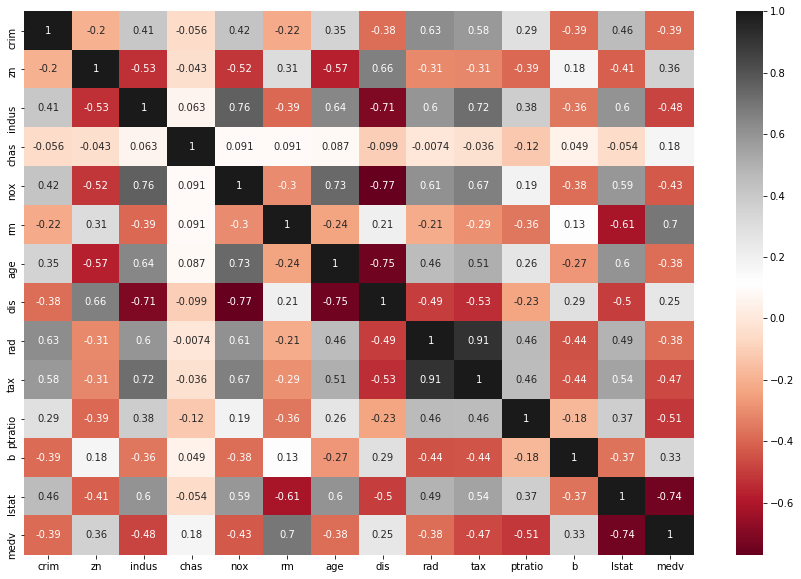

In [12]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df.corr(), annot = True, cmap = "RdGy")

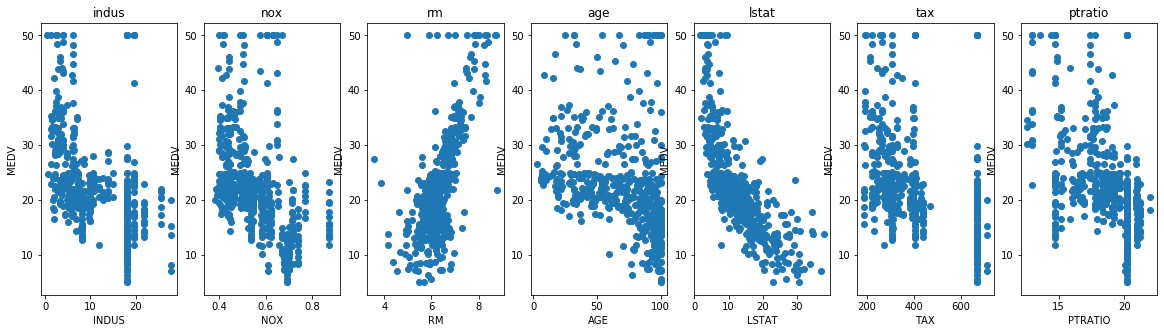

In [15]:
plt.figure(figsize = (20, 5))

options = ["indus", "nox", "rm", "age","lstat","tax","ptratio"]
target = df["medv"]

for i, col in enumerate(options):
    plt.subplot(1, len(options) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col.upper())
    plt.ylabel("MEDV")

In [32]:
df1 = df.copy()

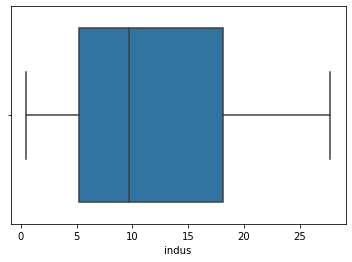

In [33]:
sns.boxplot(x = df1['indus'])

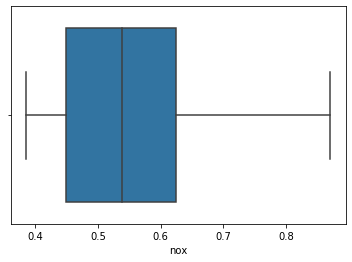

In [34]:
sns.boxplot(x = df1['nox'])

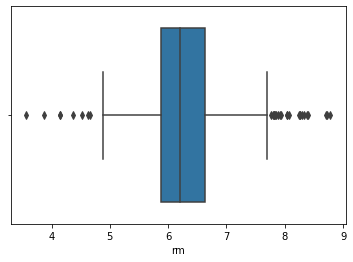

In [35]:
sns.boxplot(x = df1['rm'])

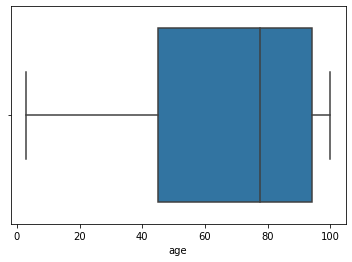

In [36]:
sns.boxplot(x = df1['age'])

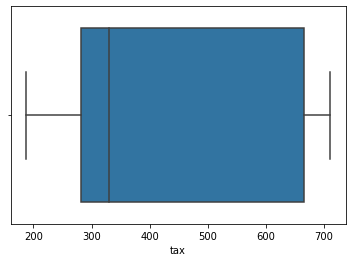

In [52]:
sns.boxplot(x = df1['tax'])

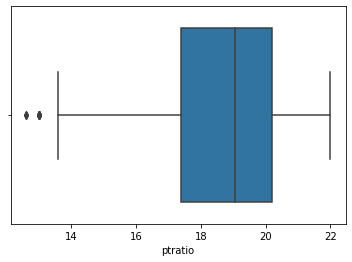

In [38]:
sns.boxplot(x = df1['ptratio'])

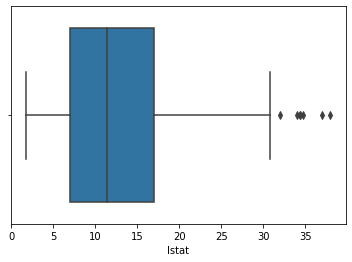

In [39]:
sns.boxplot(x = df1['lstat'])

In [40]:
cols = df1[["lstat", "rm", "ptratio", "indus", "tax"]].columns
cols

Index(['lstat', 'rm', 'ptratio', 'indus', 'tax'], dtype='object')

In [41]:
# Finding the interquartile range for the columns under consideration
result = stats.iqr(df1[cols], axis = 0)
result

array([ 10.005,   0.738,   2.8  ,  12.91 , 387.   ])

In [42]:
df1.drop(df1[df1["lstat"] < (df1["lstat"].quantile(0.25) - 1.5 * result[0])].index, inplace = True)
df1.drop(df1[df1["rm"] < (df1["rm"].quantile(0.25) - 1.5 * result[1])].index, inplace = True)
df1.drop(df1[df1["ptratio"] < (df1["ptratio"].quantile(0.25) - 1.5 * result[2])].index, inplace = True)
df1.drop(df1[df1["indus"] < (df1["indus"].quantile(0.25) - 1.5 * result[3])].index, inplace = True)
df1.drop(df1[df1["tax"] < (df1["tax"].quantile(0.25) - 1.5 * result[4])].index, inplace = True)

In [43]:
df1.drop(df1[df1["lstat"] > (df1["lstat"].quantile(0.75) + 1.5 * result[0])].index, inplace = True)
df1.drop(df1[df1["rm"] > (df1["rm"].quantile(0.75) + 1.5 * result[1])].index, inplace = True)
df1.drop(df1[df1["ptratio"] > (df1["ptratio"].quantile(0.75) + 1.5 * result[2])].index, inplace = True)
df1.drop(df1[df1["indus"] > (df1["indus"].quantile(0.75) + 1.5 * result[3])].index, inplace = True)
df1.drop(df1[df1["tax"] > (df1["tax"].quantile(0.75) + 1.5 * result[4])].index, inplace = True)

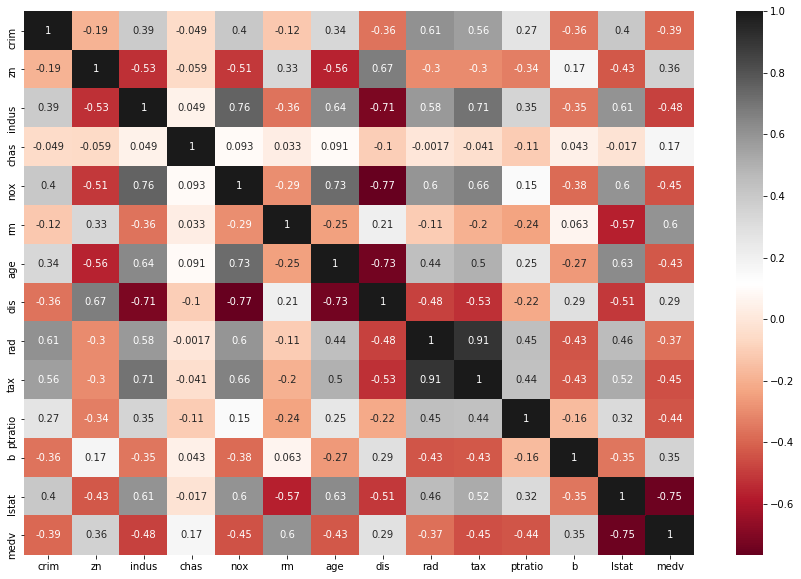

In [51]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df1.corr(), annot = True, cmap = "RdGy")

In [45]:
df1.shape

(469, 14)

# Spilitting dataset for training and testing 

In [46]:
# Concatenating LSTAT, RM and PTRATIO columns to form a new dataframe

X = pd.DataFrame(np.c_[df1["lstat"], df1["rm"], df1["ptratio"]], columns = ["lstat", "rm", "ptratio"])
Y = df1["medv"]

print("X: \n", X)
print("\nY: \n", Y)

X: 
      lstat     rm  ptratio
0     4.98  6.575     15.3
1     9.14  6.421     17.8
2     4.03  7.185     17.8
3     2.94  6.998     18.7
4     5.33  7.147     18.7
..     ...    ...      ...
464   9.67  6.593     21.0
465   9.08  6.120     21.0
466   5.64  6.976     21.0
467   6.48  6.794     21.0
468   7.88  6.030     21.0

[469 rows x 3 columns]

Y: 
 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 469, dtype: float64


In [47]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(375, 3)
(94, 3)
(375,)
(94,)


In [48]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# model performance for training set
train_prediction = lin_reg_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, train_prediction)))
r2 = r2_score(Y_train, train_prediction)

print("For training dataset:")
print("Root Mean Square Error is {}".format(rmse))
print("Accuracy is {}%".format(r2 * 100))

# model performance for testing set
test_prediction = lin_reg_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, test_prediction)))
r2 = r2_score(Y_test, test_prediction)

print("\nFor testing dataset:")
print("Root Mean Square Error is {}".format(rmse))
print("Accuracy is {}%".format(r2 * 100))

For training dataset:
Root Mean Square Error is 4.636345239535981
Accuracy is 65.05739393323569%

For testing dataset:
Root Mean Square Error is 4.460326910461066
Accuracy is 62.13084636310848%


Text(0, 0.5, 'Predicted Y')

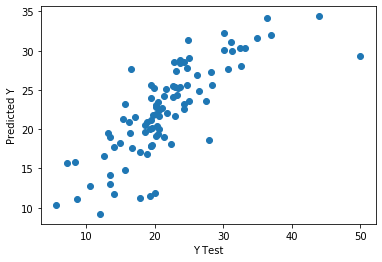

In [55]:
plt.scatter(Y_test, test_prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')